- Aim of this notebook is to train a neural network model to classify images of clothing

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.7.0


https://developers.google.com/machine-learning/glossary#a

## Import the Fashion MNIST Dataset
- 70,000 grayscale images in 10 categories
- 28 x 28 pixel size per image

In [3]:
#Import dataset using keras api
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

- To check different types of labels present, convert ndarray into df, and sort and print all unique values

In [4]:
pd.DataFrame(train_labels)[0].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
#Since each value is linked to a specific label, create a list of class labels to map
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data analysis

In [6]:
print("Shape of train_images: %s" %(str(train_images.shape)))
print("Shape of train_labels: %s" %(str(train_labels.shape)))
print("Shape of test_images: %s" %(str(test_images.shape)))
print("Shape of test_labels: %s" %(str(test_labels.shape)))

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_images: (10000, 28, 28)
Shape of test_labels: (10000,)


# Pre-Processing the data

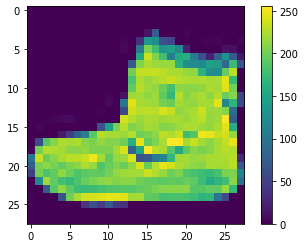

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- Before feeding into the neural network, normalize the input images by dividing all values by 255.

In [8]:
train_images = train_images / 255
test_images = test_images / 255

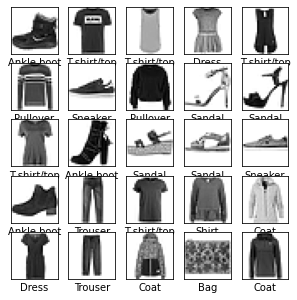

In [9]:
#Display 5 x 5 images of examples
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the Model

#### First layer - 'Flatten'
- Transforms the format of the image from a 2-dimensional array (28,28) into a one-dimensional array (28*28 = 784). This layer only reformats the data
#### Second layer - 'Dense'
- A dense layer, or a densly connected or a fully connected layer neural layers.
- The first layer has 128 nodes with activation function 'relu'
- Second layer connects to 10 nodes, indicating to each class

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Compiling the model
- Loss function -> Measures how accurate the model is during training. Minimize this funciton
- Optimizer -> How the model is updated based on the data it sees and its loss function
- Metrics -> Used to monitor the training and testing steps. Using accuracy as the metric 

In [11]:
model.compile(optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Training the model

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2312 - accuracy: 0.9136
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2177 - accuracy: 0.9181
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2119 - accuracy: 0.9203
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2058 - accuracy: 0.9229
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2019 - accuracy: 0.9238
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1945 - accuracy: 0.9269
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1894 - accuracy: 0.9285
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1830 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.180

## Evaluate Accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)  #Verbose tells how much you want to see while its running
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3422 - accuracy: 0.8946 - 398ms/epoch - 1ms/step

Test accuracy: 0.894599974155426


## Make Prediction

(28, 28)


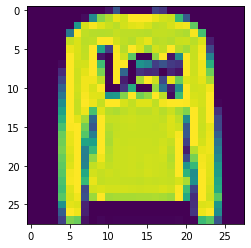

In [42]:
#Use the trained model to predict a single image
img = test_images[1]
print(img.shape)
plt.imshow(img)

- tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [36]:
# Add image into a batch where it's the only member
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [ ]:
#Normalize image before predicting :)

In [38]:
single_predict = model.predict(img)
single_predict

array([[  2.334257 , -17.13598  ,   9.887387 , -19.791697 ,   2.427866 ,
        -31.770388 ,  -0.8457886, -40.709652 , -17.47004  , -19.67043  ]],
      dtype=float32)

In [30]:
#Attach a softmax layer to convert the model's linear outputs—logits—to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = model.predict(train_images)

In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

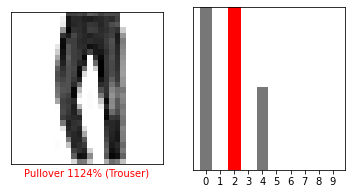

In [34]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

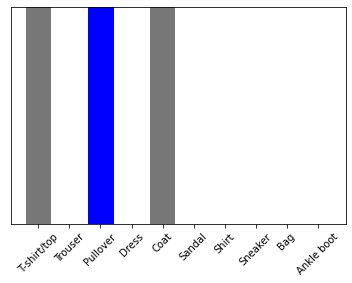

In [40]:
#Plotting the single print
plot_value_array(1, single_predict[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()